In [130]:
import pandas as pd
import numpy as np

In [131]:
data = pd.read_csv('Reviews.csv')
data.head(30).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Id,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
ProductId,B001E4KFG0,B00813GRG4,B000LQOCH0,B000UA0QIQ,B006K2ZZ7K,B006K2ZZ7K,B006K2ZZ7K,B006K2ZZ7K,B000E7L2R4,B00171APVA,...,B001GVISJM,B001GVISJM,B001GVISJM,B001GVISJM,B001GVISJM,B001GVISJM,B001GVISJM,B001GVISJM,B00144C10S,B0001PB9FY
UserId,A3SGXH7AUHU8GW,A1D87F6ZCVE5NK,ABXLMWJIXXAIN,A395BORC6FGVXV,A1UQRSCLF8GW1T,ADT0SRK1MGOEU,A1SP2KVKFXXRU1,A3JRGQVEQN31IQ,A1MZYO9TZK0BBI,A21BT40VZCCYT4,...,A1WO0KGLPR5PV6,AZOF9E17RGZH8,ARYVQL4N737A1,AJ613OLZZUG7V,A22P2J09NJ9HKE,A3FONPR03H3PJS,A3RXAU2N8KV45G,AAAS38B98HMIK,A2F4LZVGFLD1OB,A3HDKO7OW0QNK4
ProfileName,delmartian,dll pa,"Natalia Corres ""Natalia Corres""",Karl,"Michael D. Bigham ""M. Wassir""",Twoapennything,David C. Sullivan,Pamela G. Williams,R. James,Carol A. Reed,...,mom2emma,Tammy Anderson,Charles Brown,Mare's,"S. Cabanaugh ""jilly pepper""","Deborah S. Linzer ""Cat Lady""",lady21,Heather Dube,DaisyH,Canadian Fan
HelpfulnessNumerator,1,0,1,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
HelpfulnessDenominator,1,0,1,3,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,1
Score,5,1,4,2,5,4,5,5,5,5,...,5,5,5,5,5,5,1,4,5,5
Time,1303862400,1346976000,1219017600,1307923200,1350777600,1342051200,1340150400,1336003200,1322006400,1351209600,...,1313452800,1308960000,1304899200,1304467200,1295481600,1288310400,1332633600,1331856000,1338854400,1107820800
Summary,Good Quality Dog Food,Not as Advertised,"""Delight"" says it all",Cough Medicine,Great taffy,Nice Taffy,Great! Just as good as the expensive brands!,"Wonderful, tasty taffy",Yay Barley,Healthy Dog Food,...,Always fresh,TWIZZLERS,Delicious product!,Twizzlers,Please sell these in Mexico!!,Twizzlers - Strawberry,Nasty No flavor,Great Bargain for the Price,YUMMY!,The Best Hot Sauce in the World
Text,I have bought several of the Vitality canned d...,Product arrived labeled as Jumbo Salted Peanut...,This is a confection that has been around a fe...,If you are looking for the secret ingredient i...,Great taffy at a great price. There was a wid...,I got a wild hair for taffy and ordered this f...,This saltwater taffy had great flavors and was...,This taffy is so good. It is very soft and ch...,Right now I'm mostly just sprouting this so my...,This is a very healthy dog food. Good for thei...,...,My husband is a Twizzlers addict. We've bough...,I bought these for my husband who is currently...,I can remember buying this candy as a kid and ...,I love this candy. After weight watchers I ha...,"I have lived out of the US for over 7 yrs now,...",Product received is as advertised.<br /><br />...,"The candy is just red , No flavor . Just plan...",I was so glad Amazon carried these batteries. ...,I got this for my Mum who is not diabetic but ...,I don't know if it's the cactus or the tequila...


In [132]:
from copy import deepcopy

In [133]:
df = deepcopy(data[['Summary','Text','Score']])
df['Score'] = df['Score'].replace({1:0,2:0,3:0,4:1,5:1})
df = deepcopy(df.iloc[:3000])
df.head()

,Summary,Text,Score
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,Cough Medicine,If you are looking for the secret ingredient i...,0
4,Great taffy,Great taffy at a great price. There was a wid...,1


In [134]:
df['Text'][25]

'Product received is as advertised.<br /><br /><a href="http://www.amazon.com/gp/product/B001GVISJM">Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6)</a>'

In [135]:
df['Text'] = df['Summary']+' '+df['Text']

In [136]:
df.Score.value_counts(normalize=True)

1    0.765667
0    0.234333
Name: Score, dtype: float64

In [137]:
import texthero as hero

In [138]:
df['Text']=hero.drop_no_content(df['Text'])
df['Text']=hero.remove_angle_brackets(df['Text'])
df['Text']=hero.remove_brackets(df['Text'])
df['Text']=hero.remove_curly_brackets(df['Text'])
df['Text']=hero.remove_diacritics(df['Text'])
df['Text']=hero.remove_digits(df['Text'])
df['Text']=hero.remove_punctuation(df['Text'])
df['Text']=hero.remove_round_brackets(df['Text'])
df['Text']=hero.remove_square_brackets(df['Text'])
df['Text']=hero.remove_html_tags(df['Text'])
df['Text']=hero.remove_stopwords(df['Text'])
df['Text']=hero.remove_whitespace(df['Text'])
df['Text']=hero.fillna(df['Text'])
df['Text']=hero.lowercase(df['Text'])

            

In [147]:
df['word_count'] = df['Text'].apply(lambda x: len(x.split()))

In [148]:
df.head()

,Summary,Text,Score,named_entity,tfidf,pca,word_count
0,Good Quality Dog Food,good quality dog food i bought several vitalit...,1,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.35445486...","[0.016439722026103144, -0.17832453118503183]",30
1,Not as Advertised,not advertised product arrived labeled jumbo s...,0,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0624908948933611, -0.19913532356061656]",21
2,"""Delight"" says it all",delight says this confection around centuries ...,1,"[(centuries, DATE, 36, 45)]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.013211190308133171, -0.10772371961308123]",53
3,Cough Medicine,cough medicine if looking secret ingredient ro...,0,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.2682758894705937, 0.2383444400025416]",25
4,Great taffy,great taffy great taffy great price there wide...,1,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.22825519175166958, -0.25687142118110967]",17


In [140]:
df['Text'][25]

'twizzlers strawberry product received advertised twizzlers strawberry ounce bags'

In [141]:
df['named_entity']=hero.named_entities(df['Text'])
df.head()

,Summary,Text,Score,named_entity
0,Good Quality Dog Food,good quality dog food i bought several vitalit...,1,[]
1,Not as Advertised,not advertised product arrived labeled jumbo s...,0,[]
2,"""Delight"" says it all",delight says this confection around centuries ...,1,"[(centuries, DATE, 36, 45)]"
3,Cough Medicine,cough medicine if looking secret ingredient ro...,0,[]
4,Great taffy,great taffy great taffy great price there wide...,1,[]


In [142]:
df['tfidf'] = (hero.tfidf(df['Text'], max_features=100))
df.head()

,Summary,Text,Score,named_entity,tfidf
0,Good Quality Dog Food,good quality dog food i bought several vitalit...,1,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.35445486..."
1,Not as Advertised,not advertised product arrived labeled jumbo s...,0,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"""Delight"" says it all",delight says this confection around centuries ...,1,"[(centuries, DATE, 36, 45)]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Cough Medicine,cough medicine if looking secret ingredient ro...,0,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Great taffy,great taffy great taffy great price there wide...,1,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [143]:
df['pca'] = hero.pca(df['tfidf'])
hero.scatterplot(df, col='pca')

In [144]:
import seaborn as sns

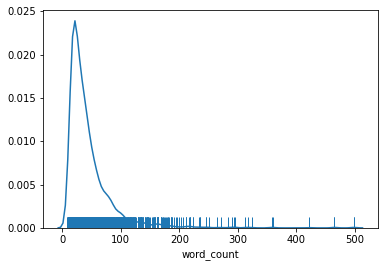

In [154]:
ax=sns.distplot(df['word_count'],hist=False,rug=True)

In [166]:
x = df.Text.values
y = df.Score.values

In [167]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2100,) (900,) (2100,) (900,)


In [168]:
!pip install imblearn

In [169]:
'''
from imblearn.over_sampling import SMOTE
smote = SMOTE()
xtrain_smote,ytrain_smote = smote(x_train,y_train)

from collections import Counter
print('before_smote',Counter(y_train))
print('after_smote',Counter(ytrain_smote))
'''

"\nfrom imblearn.over_sampling import SMOTE\nsmote = SMOTE()\nxtrain_smote,ytrain_smote = smote(x_train,y_train)\n\nfrom collections import Counter\nprint('before_smote',Counter(y_train))\nprint('after_smote',Counter(ytrain_smote))\n"

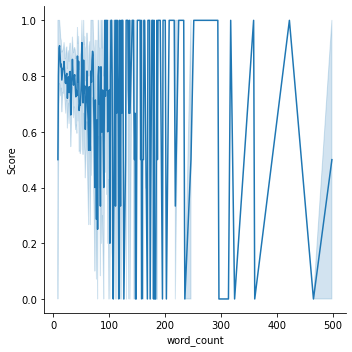

In [175]:
ax = sns.relplot(x='word_count',y='Score',data=df,kind='line')

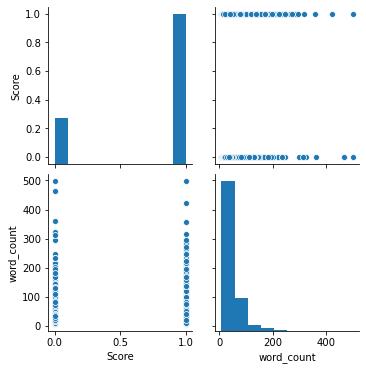

In [176]:
ax=sns.pairplot(df)